In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import nltk
import re 
from nltk.stem import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DataSet=pd.read_csv('gender-classifier-DFE-791531.csv')
DataSet2=pd.read_csv('gender-classifier-DFE-791531.csv')

In [3]:
DataSet.shape

(20050, 26)

In [5]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [6]:
DataSet.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [7]:
DataSet.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [8]:
DataSet = pd.concat([DataSet.gender, DataSet.description], axis=1)

In [9]:
DataSet2 = pd.concat([DataSet2.gender, DataSet2.description], axis=1)

In [10]:
DataSet.head(5)

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [11]:
DataSet.isna().sum()

gender           97
description    3744
dtype: int64

In [12]:
DataSet.dropna(axis=0,inplace=True)

In [13]:
DataSet2.dropna(axis=0,inplace=True)

In [14]:
DataSet.isna().sum()

gender         0
description    0
dtype: int64

In [15]:
DataSet.gender = DataSet[(DataSet.gender == 'male') | (DataSet.gender == 'female')]

In [16]:
# genders have two options (male/female). 
# i changed male to 1 and female to 0.
DataSet.gender = [1 if gender == "male" else 0 for gender in DataSet.gender]

In [17]:
DataSet.gender.value_counts()

0    10755
1     5469
Name: gender, dtype: int64

In [18]:
DataSet

,gender,description
0,1,i sing my own rhythm.
1,1,I'm the author of novels filled with family dr...
2,1,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,0,(rp)
20046,1,"Whatever you like, it's not a problem at all. ..."
20047,1,#TeamBarcelona ..You look lost so you should f...
20048,0,Anti-statist; I homeschool my kids. Aspiring t...


In [19]:
DataSet2

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,female,(rp)
20046,male,"Whatever you like, it's not a problem at all. ..."
20047,male,#TeamBarcelona ..You look lost so you should f...
20048,female,Anti-statist; I homeschool my kids. Aspiring t...


# Data cleaning

In [20]:
DataSet.description[3]

'Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.'

In [21]:
DescriptionList = []

In [22]:
for description in DataSet.description:
    description = re.sub("[^a-zA-Z]", " ", description)
    # sub method finds the given pattern ([^a-zA-Z] means, NOT letter like "/") and changes them with " " (space)
    description = description.lower()
    # we need to have all letters lowercase (because A is not equall to a)
    description = nltk.word_tokenize(description)
    # we make a word list from our text
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    # we found the roots of each words with lemma
    description = " ".join(description)
    # after all these steps,we joined the words together and remake our text.
    DescriptionList.append(description)
    # and append these texts into the "DescriptionList".

In [23]:
a=0
for i in DescriptionList:
    print(a,i)
    a+=1

0 i sing my own rhythm
1 i m the author of novel filled with family drama and romance
2 louis whining and squealing and all
3 mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer
4 ricky wilson the best frontman kaiser chief the best band xxxx thank you kaiser chief for an incredible year of gig and memory to cherish always xxxxxxx
5 you don t know me
6 a global marketplace for image video and music sharing photo inspiration design tip video for the creative community
7 the secret of getting ahead is getting started
8 pll fan crazy about mcd ramen is bae
9 renaissance art historian university of nottingham fuelled by haribo partial to coffee and with a soft spot for renaissance china national teaching fellow
10 clean food that taste great while providing energy nutrient no guilt granola vegan paleo friendly option too cert organic gf kosher
11 highly extraordinary auction
12 senior xi xii mmxiv
13 come join the faste

In [24]:
DataSet.description[3]

'Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.'

In [25]:
DescriptionList[3]

'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer'

In [26]:
DataSet['descriptionPlus'] = DescriptionList

In [27]:
DataSet.head(10)

,gender,description,descriptionPlus
0,1,i sing my own rhythm.,i sing my own rhythm
1,1,I'm the author of novels filled with family dr...,i m the author of novel filled with family dra...
2,1,louis whining and squealing and all,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",mobile guy er shazam google kleiner perkins ya...
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,ricky wilson the best frontman kaiser chief th...
5,0,you don't know me.,you don t know me
6,0,"A global marketplace for images, videos and mu...",a global marketplace for image video and music...
7,1,The secret of getting ahead is getting started.,the secret of getting ahead is getting started
8,0,Pll Fan // Crazy about MCD // Ramen is bae,pll fan crazy about mcd ramen is bae
9,0,"Renaissance art historian, University of Notti...",renaissance art historian university of nottin...


# Bag of Words
A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, 
such as with machine learning algorithms.
The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.
A bag-of-words is a representation of text that describes the occurrence of words within a document. 
It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.
A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the words within the text, i.e. considering each word count as a feature.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
MaxFeatures=5000
cv = CountVectorizer(max_features=MaxFeatures, stop_words = "english")
# we will take top 5000 feature and remove the stopwords in English language. (like "of", "and", "the" etc..)

SparceMatrix = cv.fit_transform(DescriptionList).toarray()
# we make an array from Counter vector of the "DescriptionList"
# Learn the vocabulary dictionary and return document-term matrix.

print("top used {} words: {}".format(MaxFeatures, cv.get_feature_names()))

top used 5000 words: ['aa', 'aaron', 'abc', 'aberdeen', 'ability', 'able', 'absolute', 'absolutely', 'absurdity', 'abuse', 'ac', 'academia', 'academic', 'academy', 'acc', 'accept', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accommodation', 'accomplish', 'account', 'accountant', 'accounting', 'ace', 'achieve', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addition', 'address', 'admin', 'administrator', 'admirer', 'adopted', 'adoption', 'adorable', 'adore', 'adult', 'advance', 'advanced', 'adventure', 'adventurer', 'advertising', 'advice', 'advise', 'adviser', 'advisor', 'advocacy', 'advocate', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'affiliation', 'affordable', 'aficionado', 'afraid', 'africa', 'african', 'afrikaner', 'afro', 'afternoon', 'ag', 'age', 'agency', 'age

In [29]:
cv.vocabulary_

{'sing': 4005,
 'author': 277,
 'novel': 3121,
 'filled': 1677,
 'family': 1603,
 'drama': 1311,
 'romance': 3798,
 'louis': 2678,
 'mobile': 2917,
 'guy': 1967,
 'er': 1489,
 'google': 1901,
 'yahoo': 4960,
 'pc': 3314,
 'air': 105,
 'force': 1735,
 'stanford': 4171,
 'uva': 4697,
 'dad': 1070,
 'husband': 2162,
 'brother': 551,
 'golfer': 1894,
 'ricky': 3764,
 'wilson': 4888,
 'best': 408,
 'chief': 727,
 'band': 334,
 'thank': 4420,
 'incredible': 2222,
 'year': 4965,
 'gig': 1863,
 'memory': 2820,
 'don': 1287,
 'know': 2477,
 'global': 1879,
 'marketplace': 2764,
 'image': 2198,
 'video': 4738,
 'music': 2993,
 'sharing': 3959,
 'photo': 3364,
 'inspiration': 2268,
 'design': 1174,
 'tip': 4467,
 'creative': 991,
 'community': 850,
 'secret': 3907,
 'getting': 1857,
 'ahead': 97,
 'started': 4175,
 'pll': 3414,
 'fan': 1605,
 'crazy': 984,
 'bae': 321,
 'renaissance': 3712,
 'art': 221,
 'historian': 2074,
 'university': 4661,
 'nottingham': 3119,
 'coffee': 804,
 'soft': 4074,
 

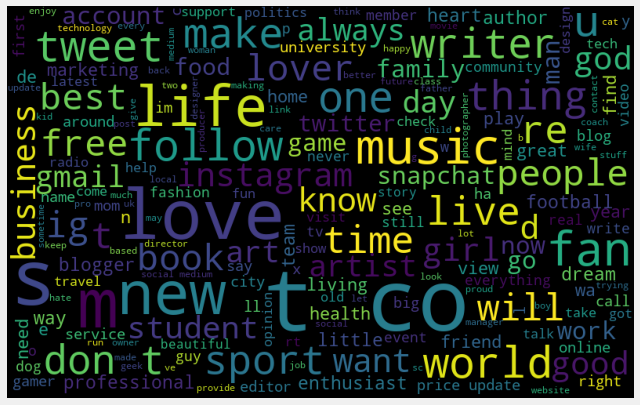

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_words = ''.join([text for text in DataSet['descriptionPlus']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Split data to  x and y 

In [32]:
y = DataSet.iloc[:, 0].values
x = SparceMatrix

In [33]:
DataSet.gender[0:10]

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    0
Name: gender, dtype: int64

In [34]:
y[0:10]

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Number of Gender')

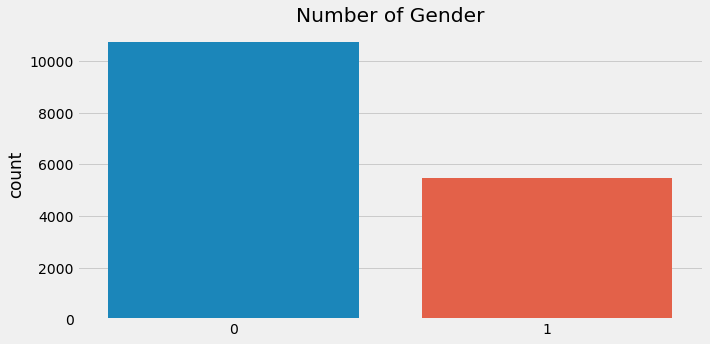

In [35]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y)
plt.title("Number of Gender")

#  Split data to train and test 

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

# Designing Model Architecture

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
tree = tree.DecisionTreeClassifier()

In [39]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = tree.predict(x_test)

In [41]:
accuracy = 100.0 * accuracy_score(y_test, y_pred)
print("Decision tree Accuracy: ", accuracy,"%")

Decision tree Accuracy:  65.31115218730746 %


In [42]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = RF.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Random forest Accuracy: ", accuracy,"%")

Random forest Accuracy:  68.26863832409119 %


In [45]:
LR = LogisticRegression(max_iter = 2000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [46]:
y_pred = LR.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Logistic regression Accuracy: ", accuracy,"%")

Logistic regression Accuracy:  70.79482439926062 %


In [48]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1099
           1       0.57      0.40      0.47       524

    accuracy                           0.71      1623
   macro avg       0.66      0.63      0.63      1623
weighted avg       0.69      0.71      0.69      1623



Precision	Precision is defined as the ratio of true positives to the sum of true and false positives.

Recall	Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

F1 Score	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

Support	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [52]:
# View confusion matrix for test data and predictions
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[939 160]
 [314 210]]


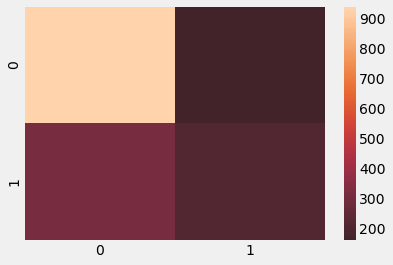

In [53]:
sns.heatmap(cm, center = True)
plt.show()

In [49]:
# 0-> Female  ||  1-> Male
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
result.head(20)

,original,predicted
0,0,1
1,1,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1
